In [1]:
!pip install pandas

     --------------------------------------- 10.0/10.0 MB 27.7 MB/s eta 0:00:00
     --------------------------------------- 14.0/14.0 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 499.4/499.4 kB ? eta 0:00:00


In [2]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 30.7 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 30.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 31.9 MB/s eta 0:00:00
     ---------------------------------------- 54.9/54.9 kB 2.8 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

df = pd.read_csv('C:/python/Jupyter/jupyter/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name','id','species','breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [8]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


([<matplotlib.axis.XTick at 0x1da1f945a08>,
 [Text(0, 0, '1'), Text(1, 0, '2')])

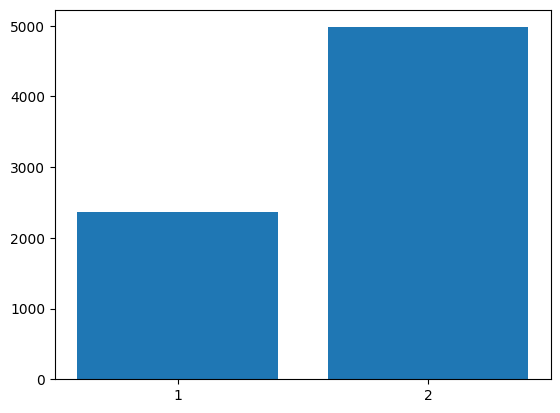

In [9]:
# 고양이인지 강아지인지 구별

value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
# 범위가 value_counts의 길이가 되고, value_counts의 values 값들을 찍어준다.

plt.xticks(range(len(value_counts)),value_counts.index.values)
# x값의 이름부분

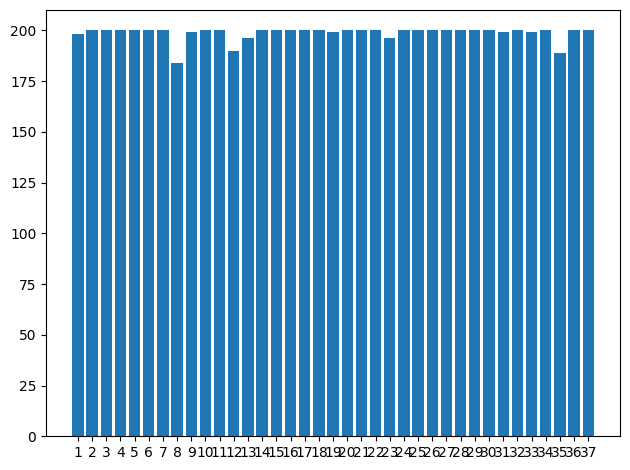

In [10]:
# 아이디별로 찍어보기

value_counts = df['id'].value_counts().sort_index()
# value_counts

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)
plt.tight_layout()

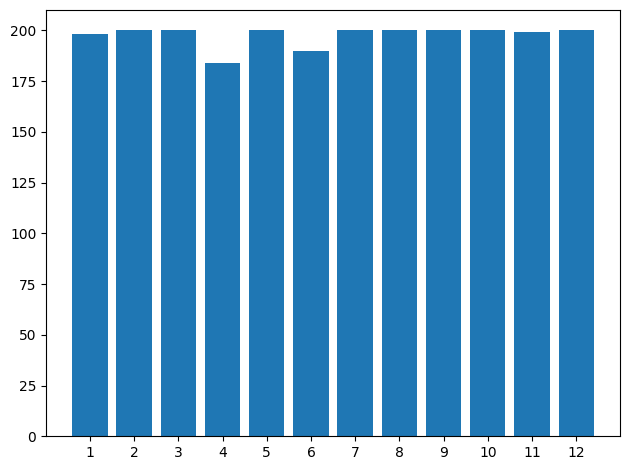

In [11]:
# 고양이

value_counts = df[df['species'] == 1]['breed'].value_counts().sort_index()
# value_counts

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)
plt.tight_layout()

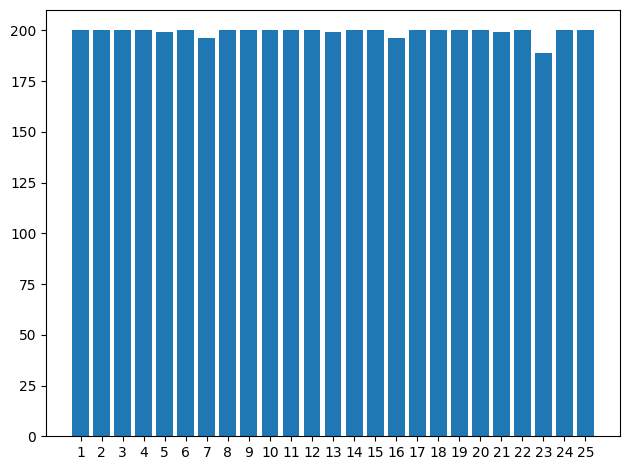

In [12]:
# 강아지

value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index()
# value_counts

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)
plt.tight_layout()

In [13]:
image_dir = 'C:/python/Jupyter/jupyter\\images\\' # 이미지를 읽어오기위해 디렉토리 만들기
bbox_dir = 'C:/python/Jupyter/jupyter\\annotations\\xmls\\'
seg_dir = 'C:/python/Jupyter/jupyter\\annotations\\trimaps\\'


In [14]:
import os
from glob import glob # 한꺼번에 파일 디렉토리를 싹 가져오는

In [15]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [16]:
image_files[:5]

['C:/python/Jupyter/jupyter\\images\\Abyssinian_1.jpg',
 'C:/python/Jupyter/jupyter\\images\\Abyssinian_10.jpg',
 'C:/python/Jupyter/jupyter\\images\\Abyssinian_100.jpg',
 'C:/python/Jupyter/jupyter\\images\\Abyssinian_101.jpg',
 'C:/python/Jupyter/jupyter\\images\\Abyssinian_102.jpg']

In [17]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [18]:
bbox_files[:5]

['C:/python/Jupyter/jupyter\\annotations\\xmls\\Abyssinian_1.xml',
 'C:/python/Jupyter/jupyter\\annotations\\xmls\\Abyssinian_10.xml',
 'C:/python/Jupyter/jupyter\\annotations\\xmls\\Abyssinian_100.xml',
 'C:/python/Jupyter/jupyter\\annotations\\xmls\\Abyssinian_101.xml',
 'C:/python/Jupyter/jupyter\\annotations\\xmls\\Abyssinian_102.xml']

In [19]:
!pip install opencv-python

In [20]:
import cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

In [21]:
images_path = image_files[2]
print(images_path)
bbox_path = images_path.replace(image_dir, bbox_dir).replace('jpg','xml') 
# 경로이름 바꿔주고, jpg확장명을 xml로 바꾸기
print(bbox_path)

C:/python/Jupyter/jupyter\images\Abyssinian_100.jpg
C:/python/Jupyter/jupyter\annotations\xmls\Abyssinian_100.xml


In [22]:
image = cv2.imread(images_path)
print(image.shape) # 가로크기, 세로크기, 3
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(500, 394, 3)


In [23]:
tree = et.parse(bbox_path)
tree

In [24]:
xmin = float(tree.find('/object/bndbox/xmin').text) # x축의 최소값 151
xmax = float(tree.find('/object/bndbox/xmax').text) #       최대값 335
ymin = float(tree.find('/object/bndbox/ymin').text) # y축의 최소값 71
ymax = float(tree.find('/object/bndbox/ymax').text) #       최대값 267

print(xmin, xmax, ymin, ymax)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

print(rect_x, rect_y, rect_w, rect_h)

151.0 335.0 71.0 267.0
151.0 71.0 184.0 196.0


c:\users\jkkim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './object/bndbox/xmin'
  """Entry point for launching an IPython kernel.
c:\users\jkkim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './object/bndbox/xmax'
  
c:\users\jkkim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './object/bndbox/ymin'
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jkkim\appdata\local\programs\python\python37\lib\sit

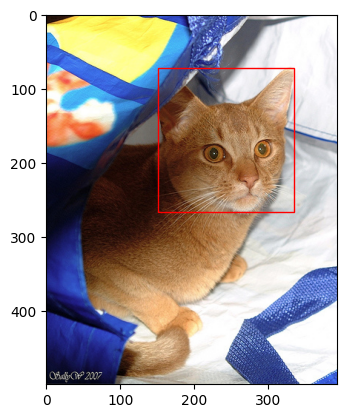

In [25]:
rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

In [26]:
image_path = image_files[2]
print(image_path)

C:/python/Jupyter/jupyter\images\Abyssinian_100.jpg


In [27]:
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg','png')
print(seg_path)

C:/python/Jupyter/jupyter\annotations\trimaps\Abyssinian_100.png


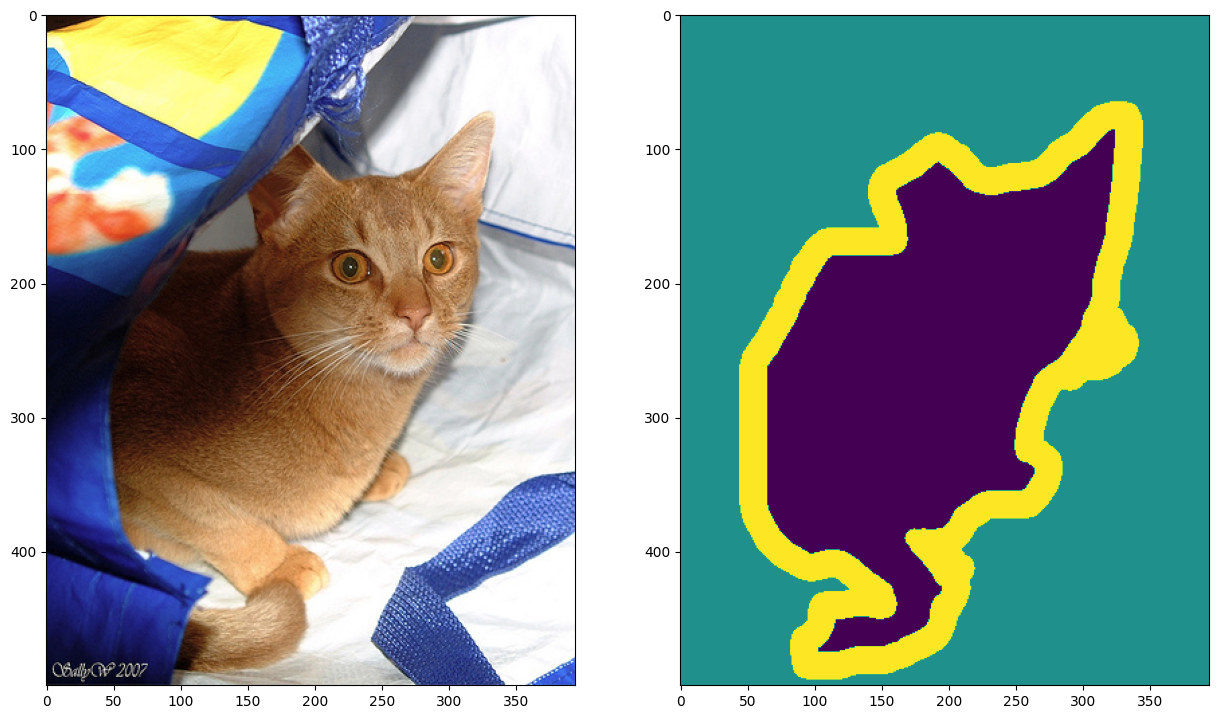

In [28]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)
plt.show()

### 교차 검증
* 데이터의 수가 적은 경우 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어짐
* 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이되지 않음 
* 데이터 수가 적은 경우 해결하기 위한 검증 방법
* 과적합을 해결하기 위한 방법


In [29]:
!pip install sklearn

In [33]:
from sklearn.model_selection import KFold

In [34]:
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [36]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 40)
# 전체를 5개로 쪼개기, 셔플 섞기, 고정값 40
df['fold'] = -1
df
# fold라는 파생변수 만들기 (옆에다가)

,file_name,id,species,breed,fold
0,Abyssinian_100,1,1,1,-1
1,Abyssinian_101,1,1,1,-1
2,Abyssinian_102,1,1,1,-1
3,Abyssinian_103,1,1,1,-1
4,Abyssinian_104,1,1,1,-1
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,-1
7345,yorkshire_terrier_97,37,2,25,-1
7346,yorkshire_terrier_98,37,2,25,-1
7347,yorkshire_terrier_99,37,2,25,-1


In [37]:
for idx, (t, v) in enumerate(kf.split(df), 1): # 
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx
    

# [   2    3    4 ... 7346 7347 7348] = t
# [   0    1    5 ... 7326 7327 7333] = v
# 1470, 1469 .. = len(V) 

[   2    3    4 ... 7346 7347 7348] [   0    1    5 ... 7326 7327 7333] 1470
[   0    1    2 ... 7344 7345 7347] [   3   15   17 ... 7338 7346 7348] 1470
[   0    1    3 ... 7346 7347 7348] [   2    4   12 ... 7330 7334 7337] 1470
[   0    1    2 ... 7346 7347 7348] [   7    8   14 ... 7341 7343 7344] 1470
[   0    1    2 ... 7344 7346 7348] [   9   11   21 ... 7342 7345 7347] 1469


In [38]:
df

,file_name,id,species,breed,fold
0,Abyssinian_100,1,1,1,1
1,Abyssinian_101,1,1,1,1
2,Abyssinian_102,1,1,1,3
3,Abyssinian_103,1,1,1,2
4,Abyssinian_104,1,1,1,3
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,4
7345,yorkshire_terrier_97,37,2,25,5
7346,yorkshire_terrier_98,37,2,25,2
7347,yorkshire_terrier_99,37,2,25,5


In [39]:
print(len(df[df['fold'] == 1]))

1470


In [40]:
print(len(df[df['fold'] != 1])) # 1을 뺀 나머지

5879


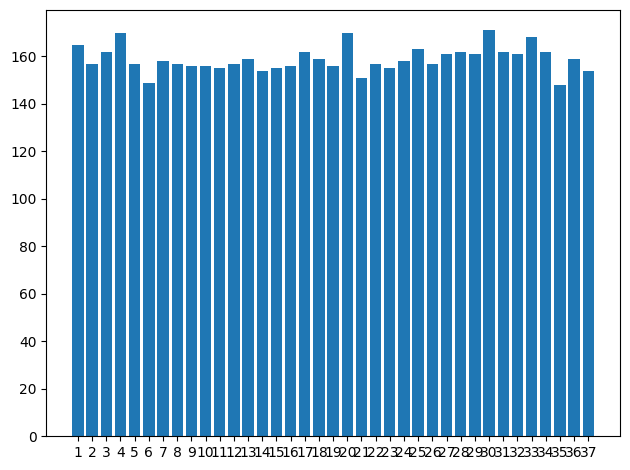

In [41]:
# 아이디가 어떻게 분포되어있는지 확인

value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import StratifiedKFold

In [45]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
# 전체를 5개로 쪼개기, 셔플 섞기, 고정값 40
df['fold'] = -1

for idx, (t, v) in enumerate(skf.split(df, df['id']), 1): # id로 평탄화 시키겠다
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    2    4 ... 7345 7346 7348] [   1    3   13 ... 7337 7342 7347] 1470
[   0    1    2 ... 7346 7347 7348] [   6   25   31 ... 7333 7340 7344] 1470
[   1    3    4 ... 7344 7345 7347] [   0    2    8 ... 7343 7346 7348] 1470
[   0    1    2 ... 7346 7347 7348] [   7   10   11 ... 7336 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [   4    5    9 ... 7321 7328 7338] 1469


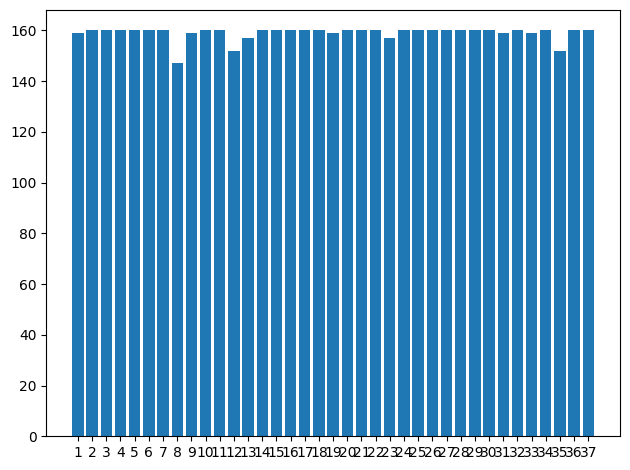

In [46]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)
plt.tight_layout()
plt.show()

In [47]:
df.to_csv('C:\python\Jupyter\jupyter/kfolds.csv', index=False) # 저장하기